In [1]:
import pandas as pd
import numpy as np
import warnings
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [2]:
warnings.filterwarnings("ignore")

<span style="font-family: 'Trebuchet MS', sans-serif; font-weight: 100; letter-spacing: 0.8px; line-height: 0.7;">
    

# Agrupamento Hierárquico

<img src="https://miro.medium.com/v2/resize:fit:1400/1*1O7uNCBALn5T92lMPt76oA.png" width="800">

</span>

<span style="font-size: 12px; font-family: 'Trebuchet MS', sans-serif;  font-weight: 100;">

## Introdução

O agrupamento hierárquico é uma técnica de machine learning não supervisionada que visa agrupar dados com base em sua similaridade. Diferentemente de métodos como o k-means, o agrupamento hierárquico não requer que o número de clusters seja especificado a priori.

## Conceitos Teóricos
---
### Tipos de Agrupamento Hierárquico

Existem dois tipos principais de agrupamento hierárquico:

1. **Aglomerativo (Bottom-Up)**: Começa com cada ponto como um cluster individual e, iterativamente, combina os clusters mais próximos até que todos os pontos estejam em um único cluster.
2. **Divisivo (Top-Down)**: Começa com todos os pontos em um único cluster e, iterativamente, divide o cluster em partes menores até que cada ponto esteja em seu próprio cluster.

### Dendrograma

Um dendrograma é uma árvore que mostra a disposição dos clusters em cada etapa do processo hierárquico. Ele ajuda a visualizar a hierarquia de clusters.

<img src="https://storage.googleapis.com/lds-media/images/distance-method-dendrogram-comparison.width-745.png" width="600">

### Distância e Similaridade

Para agrupar os pontos, precisamos definir uma medida de distância ou similaridade entre eles. Algumas medidas comuns incluem:
- **Distância Euclidiana**
- **Distância Manhattan**
- **Correlação**
- **Distância de Minkowski**

### Linkage Criteria

Os métodos de linkage determinam como calcular a distância entre dois clusters. Alguns métodos comuns incluem:
- **Single Linkage**: Distância mínima entre os pontos mais próximos de dois clusters.
- **Complete Linkage**: Distância máxima entre os pontos mais distantes de dois clusters.
- **Average Linkage**: Média das distâncias entre todos os pares de pontos dos dois clusters.
- **Ward's Linkage**: Aumento da soma dos quadrados dentro do cluster ao combinar dois clusters.

<img src="https://editor.analyticsvidhya.com/uploads/40351linkages.PNG" width="600">

---
## Funcionamento do Algoritmo Aglomerativo

1. **Inicialização**: Começa com `n` clusters (cada ponto é um cluster).
2. **Iteração**: 
    - Encontra o par de clusters mais próximos de acordo com o critério de linkage.
    - Combina esses clusters em um novo cluster.
3. **Repetição**: Repete o passo 2 até restar um único cluster.

---
## Parâmetros

Os principais parâmetros para o agrupamento hierárquico incluem:
- **n_clusters**: O número desejado de clusters.
- **affinity**: Métrica de similaridade usada para calcular a distância entre pontos (ex: 'euclidean', 'manhattan').
- **linkage**: Critério de linkage usado (ex: 'single', 'complete', 'average', 'ward').
---
## Métricas para avaliação:
Para avaliar a qualidade dos clusters formados, podemos usar diversas métricas, como:

- **Índice de Silhueta:** Mede quão semelhante um ponto é ao seu próprio cluster comparado ao cluster mais próximo.
- **Inércia:** Soma das distâncias quadráticas dos pontos para o centro do cluster (menor é melhor).
- **Coeficiente de Rand Ajustado:** Avalia a similaridade entre duas partições do mesmo conjunto de dados, ajustado pelo acaso.

</span>

<span style="font-family: 'Trebuchet MS', sans-serif;">

## Base Teórica
</span>

In [3]:
x=[20,  27,  21,  37,  46, 53, 55,  47,  52,  32,  39,  41,  39,  48,  48]  
y=[1000,1200,2900,1850,900,950,2000,2100,3000,5900,4100,5100,7000,5000,6500]  

In [4]:
grafico = px.scatter(x = x, y = y, height = 500, width = 700)
grafico.show()

In [5]:
base_salario = np.array([[20,1000],[27,1200],[21,2900],[37,1850],[46,900],
                        [53,950],[55,2000],[47,2100],[52,3000],[32,5900],
                        [39,4100],[41,5100],[39,7000],[48,5000],[48,6500]])

In [6]:
scaler_salario = StandardScaler()
base_salario = scaler_salario.fit_transform(base_salario)

In [7]:
base_salario

array([[-1.87963884, -1.11413572],
       [-1.23255006, -1.01725435],
       [-1.78719758, -0.19376273],
       [-0.30813751, -0.70238991],
       [ 0.52383377, -1.1625764 ],
       [ 1.17092255, -1.13835606],
       [ 1.35580506, -0.62972888],
       [ 0.61627503, -0.5812882 ],
       [ 1.0784813 , -0.14532205],
       [-0.77034379,  1.25945777],
       [-0.12325501,  0.38752547],
       [ 0.0616275 ,  0.8719323 ],
       [-0.12325501,  1.79230528],
       [ 0.70871628,  0.82349162],
       [ 0.70871628,  1.55010187]])

In [8]:
grafico = px.scatter(x = base_salario[:, 0], y = base_salario[:, 1], height = 500, width = 700)
grafico.show()

<span style="font-family: 'Trebuchet MS', sans-serif;">

### Dendrograma
</span>

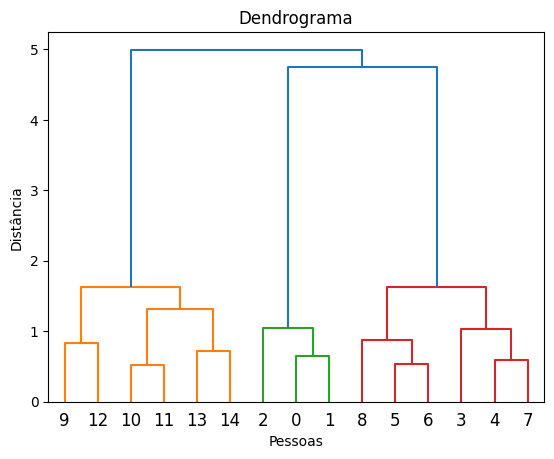

In [9]:
dendrograma = dendrogram(
    linkage(base_salario, method = 'ward')
)
plt.title('Dendrograma')
plt.xlabel('Pessoas')
plt.ylabel('Distância');

<span style="font-family: 'Trebuchet MS', sans-serif;">
    
### Criando o AgglomerativeClustering
</span>

In [10]:
hc_salario = AgglomerativeClustering(
    n_clusters = 3, linkage = 'ward',
    affinity = 'euclidean'
)
rotulos = hc_salario.fit_predict(base_salario);

In [11]:
rotulos

array([2, 2, 2, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=int64)

In [12]:
grafico = px.scatter(x = base_salario[:, 0], y = base_salario[:, 1], color = rotulos, height = 500, width = 700)
grafico.show()